In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

In [2]:
x=np.array([[2,6],[2,10],[11,11],[6,9],[6,11],[1,2],[5,10]])

In [3]:
def find_random_cluster(x,n_cluster,n_seed=3):
    random_state=np.random.RandomState(n_seed)
    print('random state:',random_state)
    i=random_state.permutation(x.shape[0])[:n_cluster]
    print('permutation:',i)
    centroid=x[i]
    print('initial centroid:',centroid)
    print('updated centroid:')
    
    while True:
        label=pairwise_distances_argmin(x,centroid)
        print('label:',label)
        new_centroid=np.array([x[label==i].mean(0) for i in range(n_cluster)])
        print('updated centroid:',new_centroid)
        
        if np.all(centroid==new_centroid):
            break
        centroid==new_centroid
        print('new centroid:',centroid)
        return label,centroid
n_cluster=3
label,centroid=find_random_cluster(x,n_cluster)

random state: RandomState(MT19937)
permutation: [4 6 5]
initial centroid: [[ 6 11]
 [ 5 10]
 [ 1  2]]
updated centroid:
label: [2 1 0 1 0 2 1]
updated centroid: [[ 8.5        11.        ]
 [ 4.33333333  9.66666667]
 [ 1.5         4.        ]]
new centroid: [[ 6 11]
 [ 5 10]
 [ 1  2]]


In [3]:
from sklearn import datasets
from sklearn.datasets import make_blobs
x,y=datasets.make_blobs(n_samples=50,n_features=2,centers=None,random_state=42)

In [4]:
df=pd.DataFrame(x,columns=['x0','x1'])
new=df.copy()
new['target']=y
new.head()

,x0,x1,target
0,-3.110904,10.866564,0
1,-2.300334,7.054616,0
2,3.161357,1.253325,1
3,-9.499372,-6.058207,2
4,-3.417222,7.601982,0


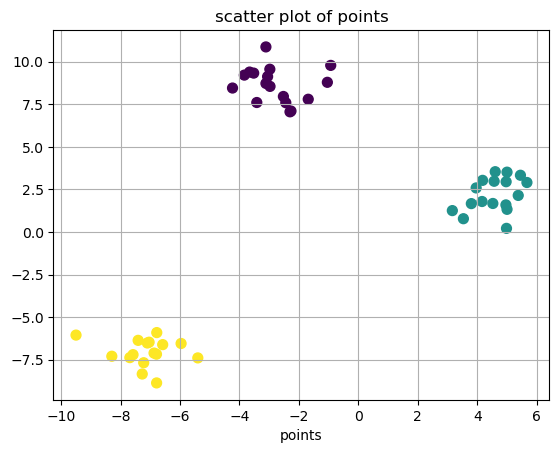

In [6]:
plt.title('scatter plot of points')
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',s=50)
plt.grid(True)
plt.xlabel('points')
plt.ylabel('')
plt.show()

initial centroid: [[-2.97867201  9.55684617]
 [ 5.00151486  1.32804993]
 [-6.78254964 -5.9114646 ]]


C:\Users\22anj\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


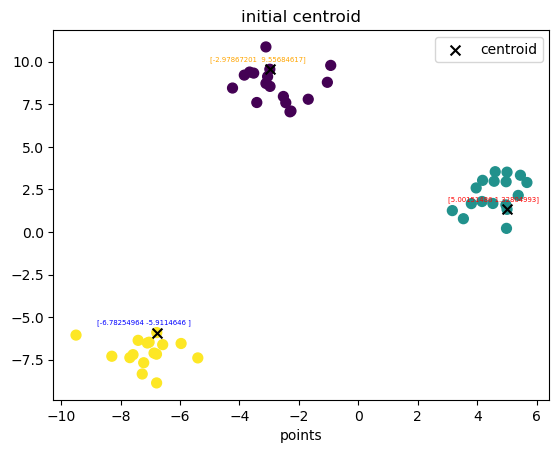

updated centroid:1 [[-2.76992171  8.63934248]
 [ 4.58339032  2.19106246]
 [-7.14342642 -7.06139119]]


C:\Users\22anj\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


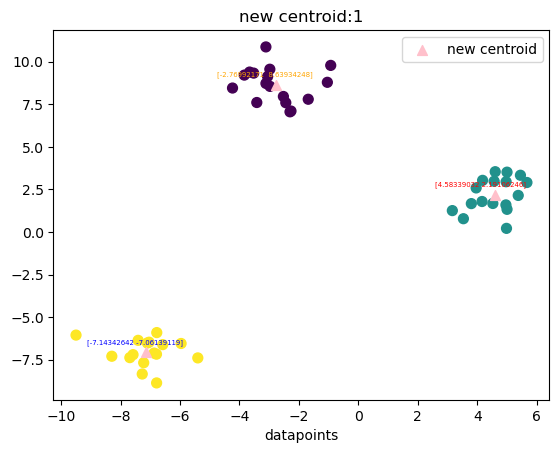

updated centroid:2 [[-2.76992171  8.63934248]
 [ 4.58339032  2.19106246]
 [-7.14342642 -7.06139119]]


,x0,x1,labels1
0,-3.110904,10.866564,0
1,-2.300334,7.054616,0
2,3.161357,1.253325,1
3,-9.499372,-6.058207,2
4,-3.417222,7.601982,0
5,-1.043549,8.788510,0
6,-3.053580,9.125209,0
7,-2.522695,7.956575,0
8,5.670878,2.904450,1
9,-7.581680,-7.207772,2


In [7]:
n_clusters=3
def kmeans(n_clusters,x,y,df):
    new=df.copy()
    random=np.random.RandomState(8)
    i=random.permutation(x.shape[0])[:n_clusters]
    centroid=x[i]
    print('initial centroid:',centroid)
    plt.title('initial centroid')
    plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',s=50)
    plt.scatter(centroid[:,0],centroid[:,1],s=50,marker='x',c='black',label='centroid')
    plt.xlabel('points')
    plt.ylabel('')
    plt.legend()
    plt.text(centroid[0][0]-2,centroid[0][1]+0.5,centroid[0],fontsize=5,color='orange')
    plt.text(centroid[1][0]-2,centroid[1][1]+0.5,centroid[1],fontsize=5,color='red')
    plt.text(centroid[2][0]-2,centroid[2][1]+0.5,centroid[2],fontsize=5,color='blue')
    plt.show()
    j=1
    while True:
        label=pairwise_distances_argmin(x,centroid)
        new_centroid=np.array([x[label==i].mean(0) for i in range (n_cluster)])
        print('updated centroid:'+str(j),new_centroid)
        if np.all(centroid==new_centroid):
            break
        centroid=new_centroid
        new['labels'+str(j)]=label
        plt.title('new centroid:'+str(j))
        plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',s=50)
        plt.scatter(centroid[:,0],centroid[:,1],s=50,marker='^',c='pink',label='new centroid')
        plt.xlabel('datapoints')
        plt.ylabel('')
        plt.legend()
        plt.text(centroid[0][0]-2,centroid[0][1]+0.5,centroid[0],fontsize=5,color='orange')
        plt.text(centroid[1][0]-2,centroid[1][1]+0.5,centroid[1],fontsize=5,color='red')
        plt.text(centroid[2][0]-2,centroid[2][1]+0.5,centroid[2],fontsize=5,color='blue')
        plt.show()
        j=j+1
    return new

kmeans(3,x,y,df)
    

In [8]:
from sklearn.metrics import silhouette_score,accuracy_score
from sklearn.cluster import KMeans

In [9]:
k=KMeans(n_clusters=3,max_iter=20,random_state=42)
k.fit(df)
y_pred=k.predict(df)
acc=silhouette_score(df,y_pred)
print('score:',acc)


C:\Users\22anj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\22anj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


score: 0.8526477726400524


In [10]:
kmeans=k.cluster_centers_
print('cluster centroid:',kmeans)

cluster centroid: [[ 4.58339032  2.19106246]
 [-7.14342642 -7.06139119]
 [-2.76992171  8.63934248]]


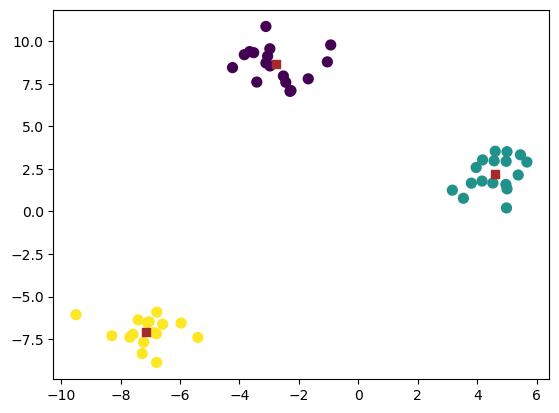

In [11]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis',s=50)
plt.scatter(kmeans[:,0],kmeans[:,1],marker='s',c='brown',label='centroid')

In [5]:
new['target'].unique()
new.head()

,x0,x1,target
0,-3.110904,10.866564,0
1,-2.300334,7.054616,0
2,3.161357,1.253325,1
3,-9.499372,-6.058207,2
4,-3.417222,7.601982,0


In [6]:
def KNN(point,new):
    distance=[]
    for i in new:
        add=0
        for j in range(len(new[0])):
            add+=(i[j]-point[j])**2
            distance.append(np.sqrt(add))
    return distance
    
D=KNN((-6,10),new)
nnew=new.copy()
nnew["Distance"]=D
nnew.sort_values('Distance',inplace=True)
nnew.head(10)

KeyError: 0

In [14]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.23,random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,10):
    k=KNeighborsClassifier(n_neighbors=i)
    k.fit(x_train,y_train)
    y_pred=k.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

ValueError: Found input variables with inconsistent numbers of samples: [38, 12]